In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("crypto_interest_global.csv")

df["Interest"] = (
    df["Interest"]
    .astype(str)               # ensure strings
    .str.replace(">", "", regex=False)
    .str.replace("<", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.strip()
)
country_replacements = {
    "Brasil": "Brazil"}

df["Country"] = df["Country"].replace(country_replacements)

# Convert to numeric (non-convertible → NaN)
df["Interest"] = pd.to_numeric(df["Interest"], errors="coerce")

# Aggregate by country
country_interest = df.groupby('Country', as_index=False)['Interest'].mean()

fig = px.choropleth(
    country_interest,
    locations='Country',
    locationmode='country names',
    color='Interest',
    color_continuous_scale='viridis',
    title='Global Interest in Cryptocurrencies (Average by Country)',
)
fig.show()


/tmp/ipython-input-2374411916.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2374411916.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2374411916.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2374411916.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2374411916.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

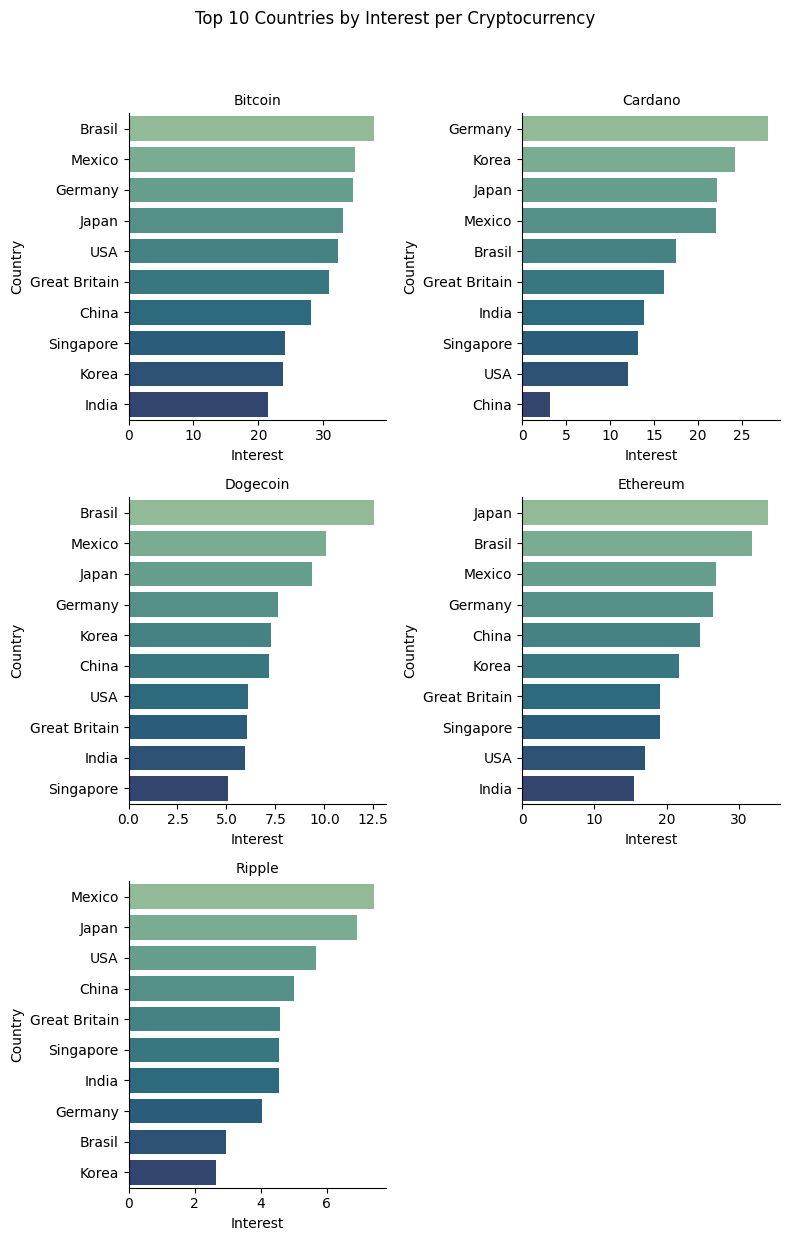

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("crypto_interest_global.csv")

# Clean Interest column
df["Interest"] = (
    df["Interest"]
    .astype(str)
    .str.replace(">", "", regex=False)
    .str.replace("<", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.strip()
)
df["Interest"] = pd.to_numeric(df["Interest"], errors="coerce")

# Aggregate by crypto and country
country_avg = df.groupby(["Crypto", "Country"], as_index=False)["Interest"].mean()

# Take top 10 per crypto
top10_per_crypto = (
    country_avg.sort_values(["Crypto", "Interest"], ascending=[True, False])
    .groupby("Crypto")
    .head(10)
)

# Sort countries within each facet so bars go from high → low
def sort_within_facet(data, **kwargs):
    sns.barplot(
        data=data.sort_values("Interest", ascending=False),
        x="Interest",
        y="Country",
        palette="crest",
        **kwargs
    )

# Create facet grid (independent Y scales!)
g = sns.FacetGrid(
    top10_per_crypto,
    col="Crypto",
    col_wrap=2,
    sharex=False,
    sharey=False,
    height=4
)
g.map_dataframe(sort_within_facet)

# Titles & layout
g.set_titles("{col_name}")
g.fig.suptitle("Top 10 Countries by Interest per Cryptocurrency", y=1.03)
g.tight_layout()
plt.show()


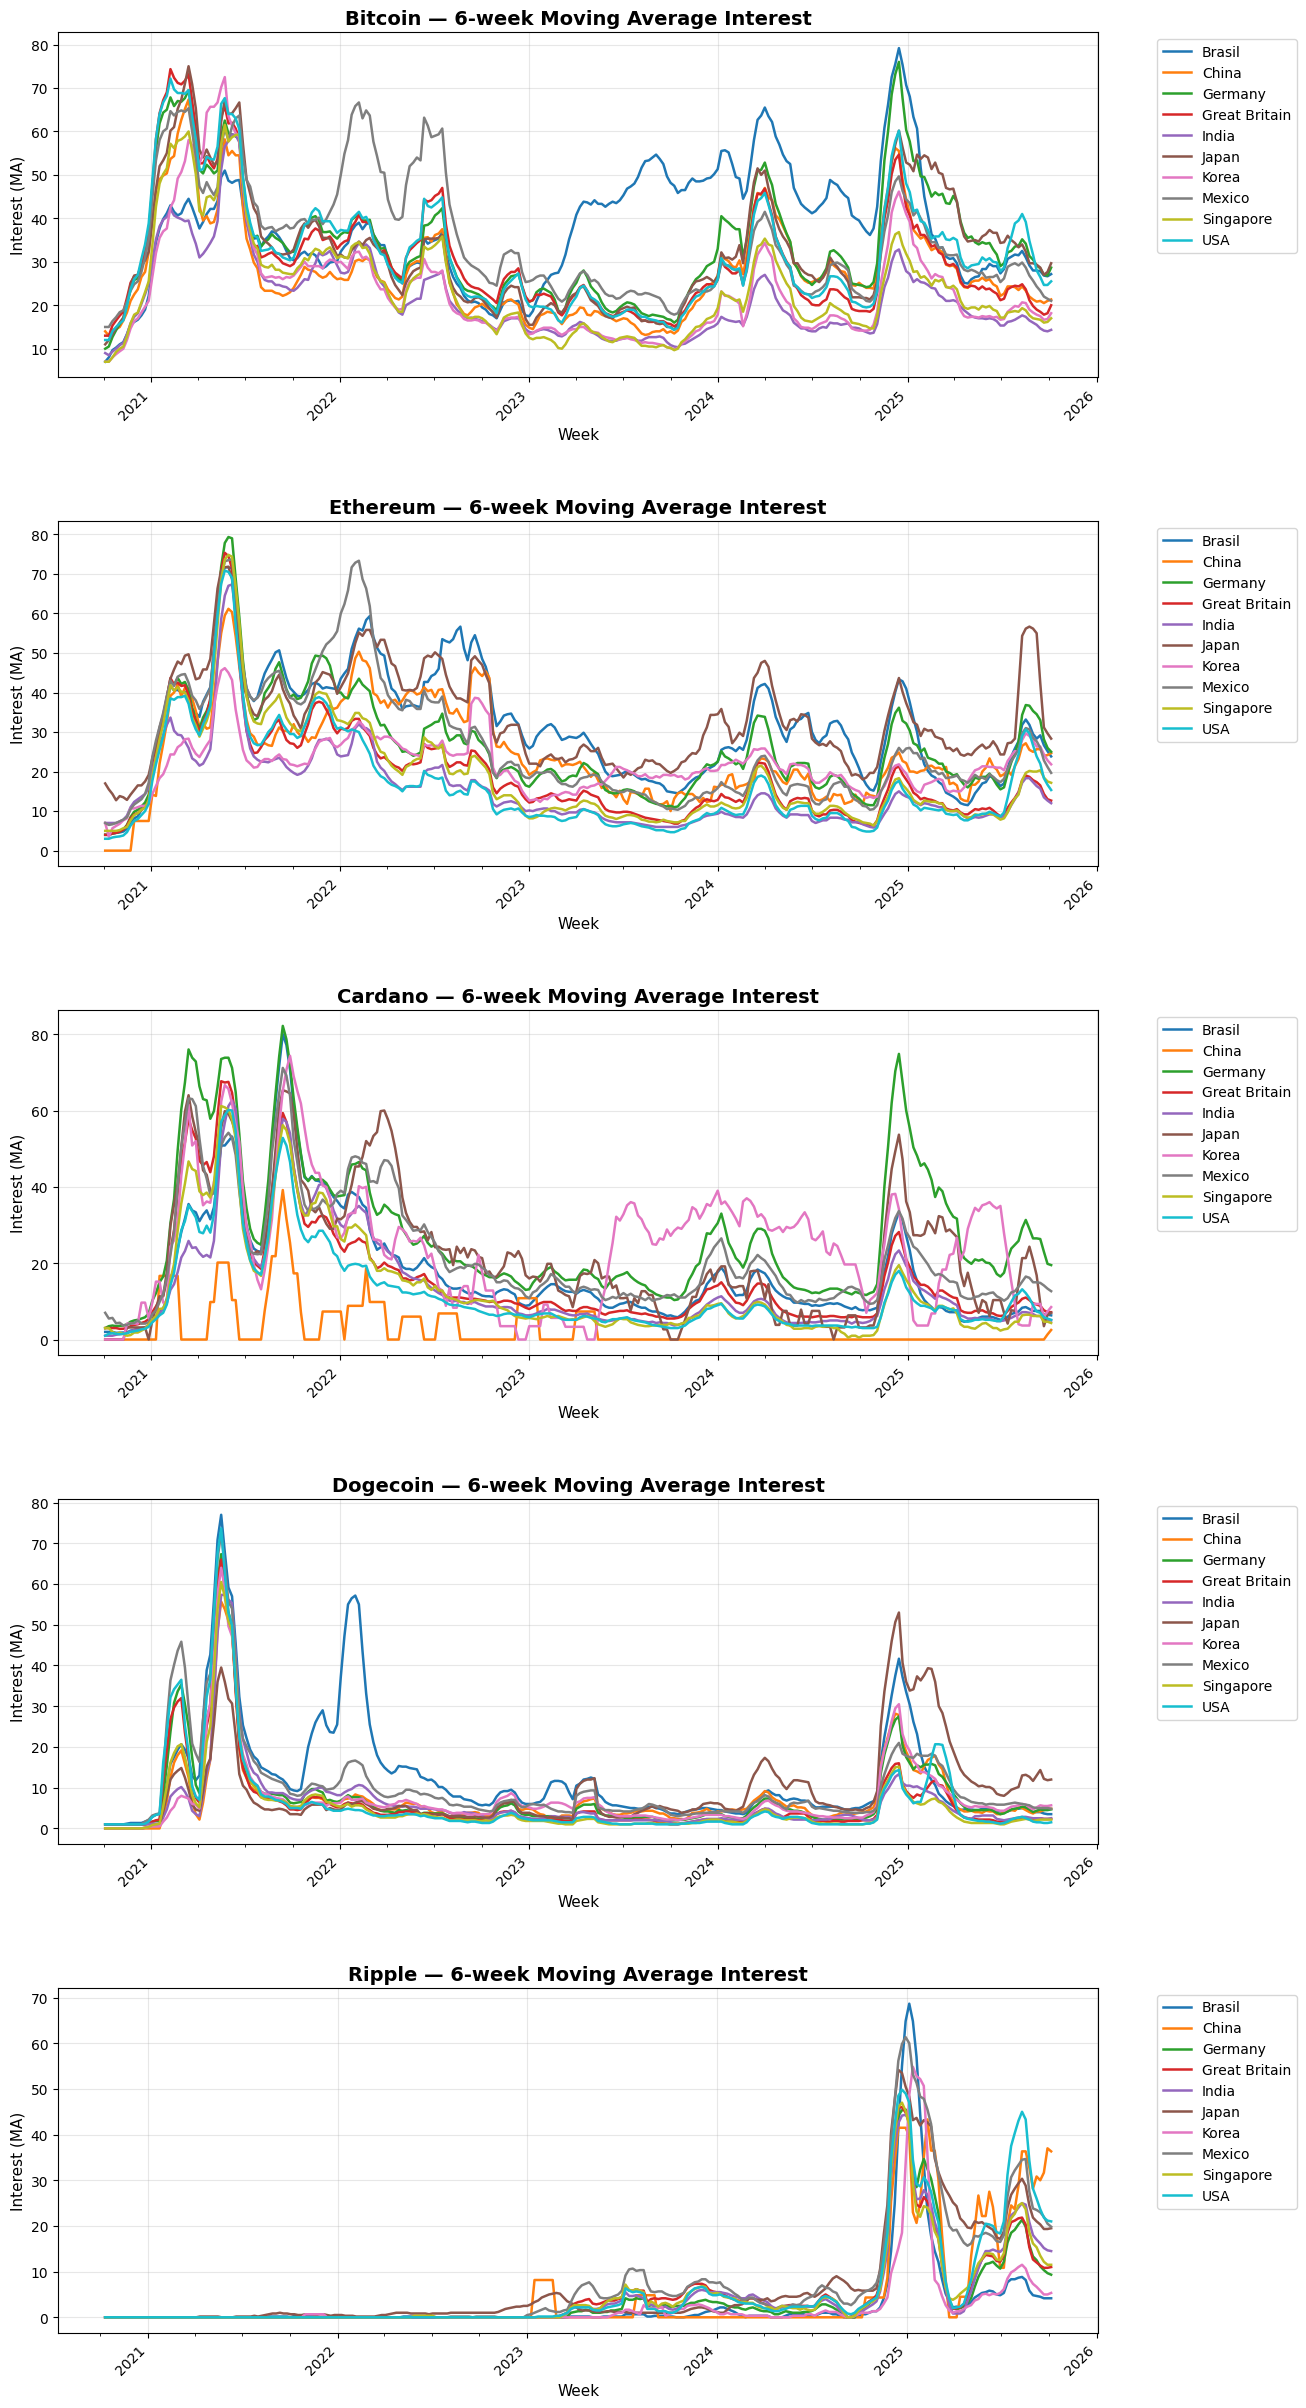

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and clean
df = pd.read_csv("crypto_interest_global.csv")

df["Interest"] = (
    df["Interest"]
    .astype(str)
    .str.replace(">", "", regex=False)
    .str.replace("<", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.strip()
)

df["Interest"] = pd.to_numeric(df["Interest"], errors="coerce")

# Ensure Week is datetime
df["Week"] = pd.to_datetime(df["Week"], errors="coerce")

# Compute 6-week moving average
df["Interest_MA"] = (
    df.sort_values(["Country", "Week"])
    .groupby(["Country", "Crypto"])["Interest"]
    .transform(lambda x: x.rolling(6, min_periods=1).mean())
)

# Define unique cryptos
cryptos = df["Crypto"].unique()

# Create separate subplots (no shared x-axis)
fig, axes = plt.subplots(len(cryptos), 1, figsize=(14, 5 * len(cryptos)), sharex=False)

# Ensure axes is iterable even if there's only one crypto
if len(cryptos) == 1:
    axes = [axes]

for ax, crypto in zip(axes, cryptos):
    temp = df[df["Crypto"] == crypto]
    sns.lineplot(
        data=temp,
        x="Week",
        y="Interest_MA",
        hue="Country",
        ax=ax,
        linewidth=1.8
    )

    # ---- Option 1: Format x-axis for better readability ----
    ax.xaxis.set_major_locator(mdates.YearLocator())                   # one major tick per year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))           # show year only
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # minor ticks quarterly
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")            # tilt labels

    ax.set_title(f"{crypto} — 6-week Moving Average Interest", fontsize=14, weight='bold')
    ax.set_xlabel("Week", fontsize=11)
    ax.set_ylabel("Interest (MA)", fontsize=11)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(True, alpha=0.3)

plt.tight_layout(pad=4.0)
plt.show()


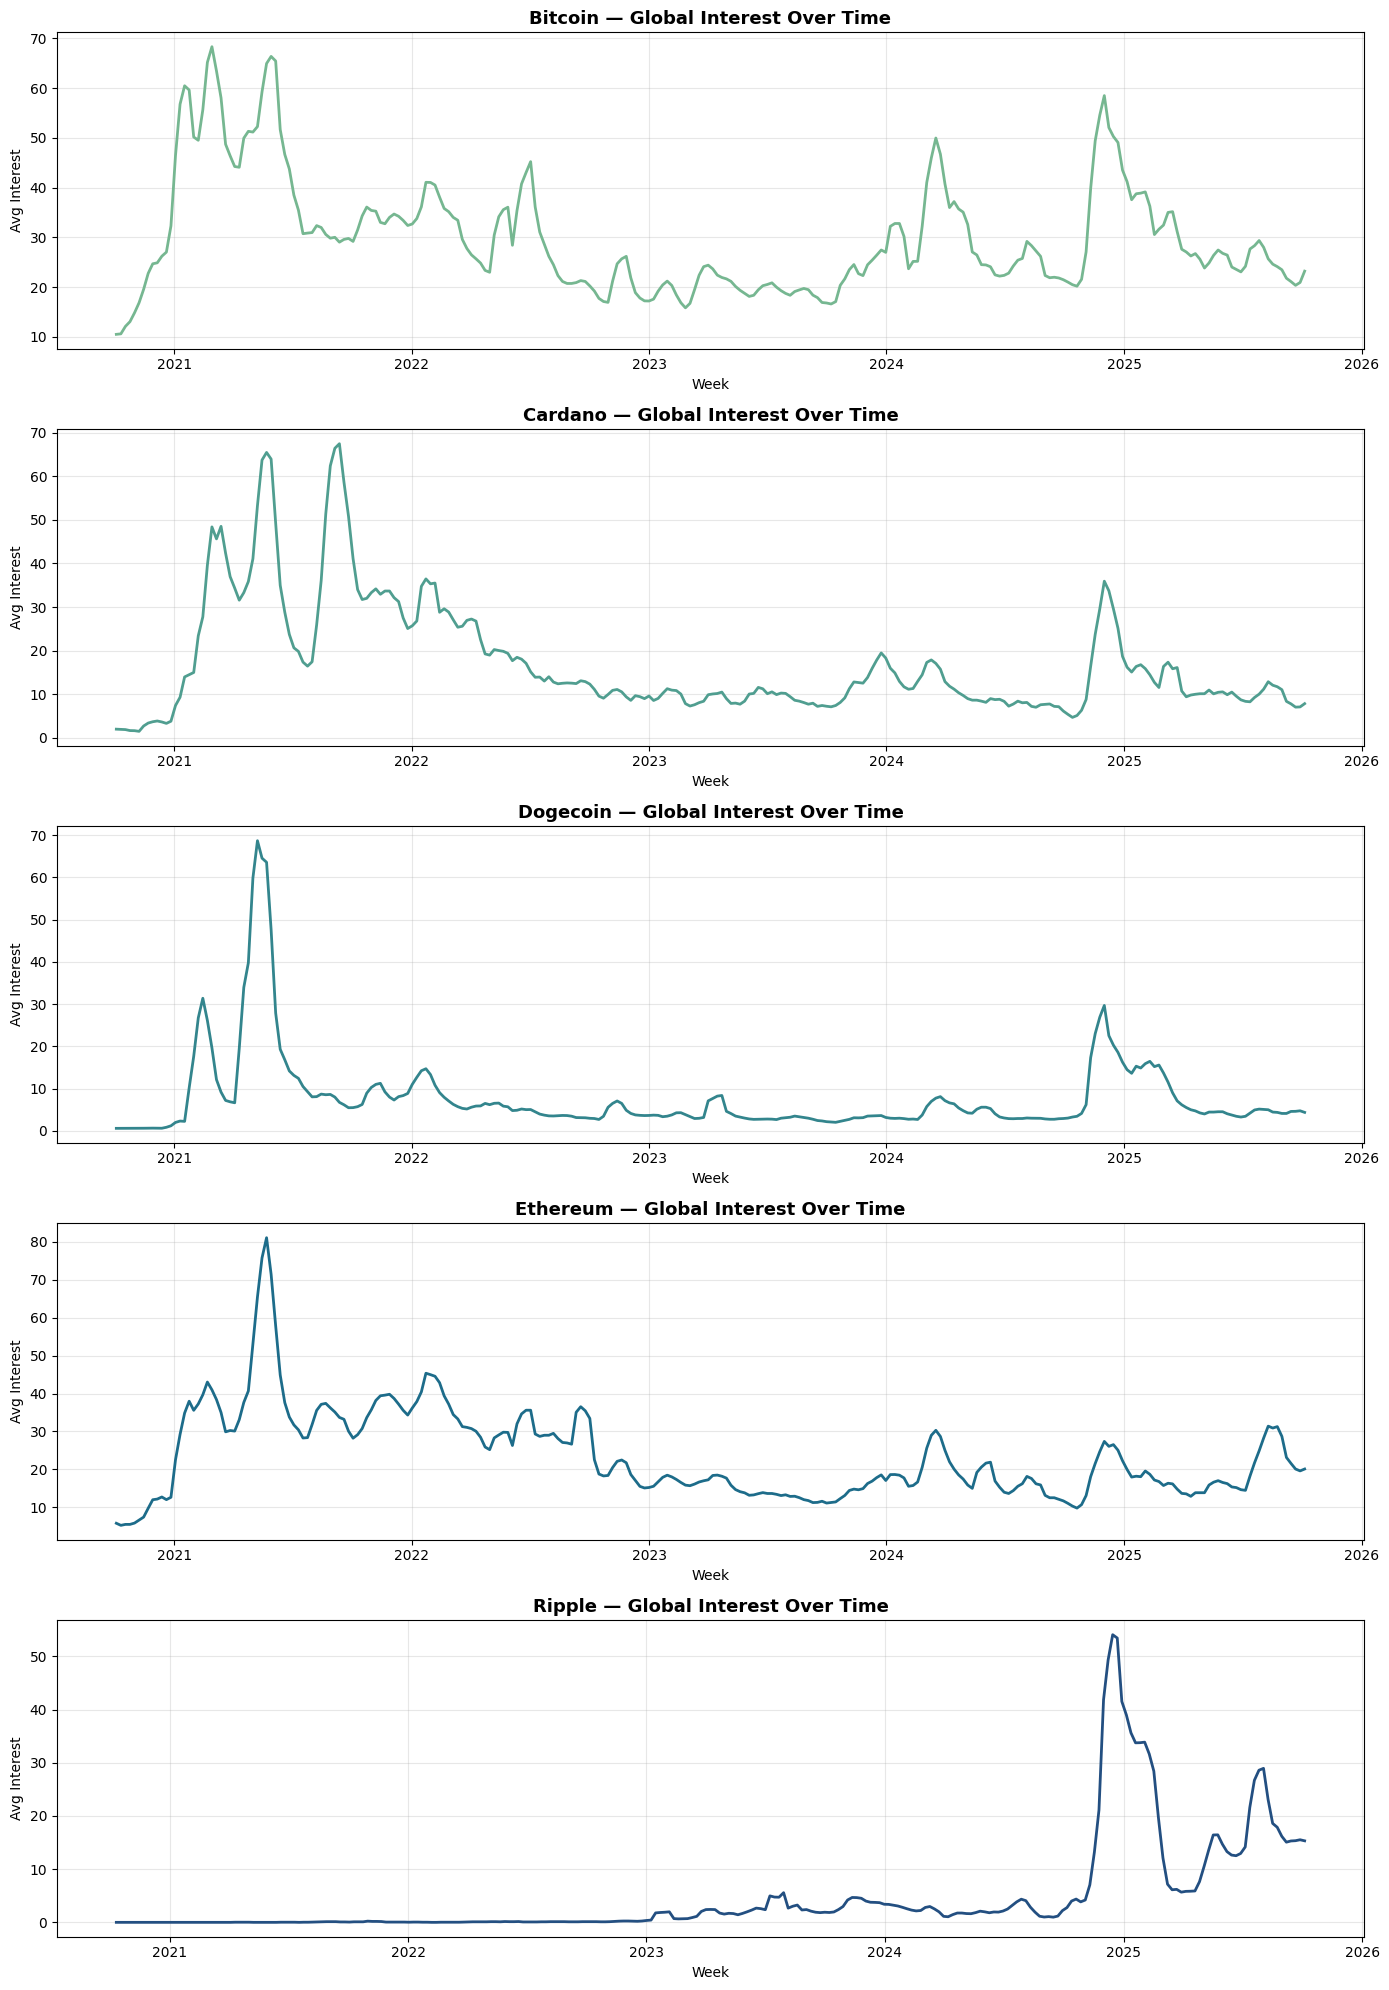

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean
df = pd.read_csv("crypto_interest_global.csv")

df["Interest"] = (
    df["Interest"]
    .astype(str)
    .str.replace(">", "", regex=False)
    .str.replace("<", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.strip()
)
df["Interest"] = pd.to_numeric(df["Interest"], errors="coerce")
df["Week"] = pd.to_datetime(df["Week"], errors="coerce")

# Aggregate global mean per week and crypto
global_trend = (
    df.groupby(["Week", "Crypto"], as_index=False)["Interest"].mean()
    .sort_values("Week")
)

# Apply 4-week moving average
global_trend["Interest_MA"] = (
    global_trend.groupby("Crypto")["Interest"]
    .transform(lambda x: x.rolling(4, min_periods=1).mean())
)

# Create subplots — no shared X axes
cryptos = global_trend["Crypto"].unique()
n = len(cryptos)

fig, axes = plt.subplots(n, 1, figsize=(14, 4 * n), sharex=False)

for i, crypto in enumerate(cryptos):
    ax = axes[i] if n > 1 else axes
    subset = global_trend[global_trend["Crypto"] == crypto]
    sns.lineplot(
        data=subset,
        x="Week",
        y="Interest_MA",
        color=sns.color_palette("crest", n)[i],
        linewidth=2,
        ax=ax
    )
    ax.set_title(f"{crypto} — Global Interest Over Time", fontsize=13, weight='bold')
    ax.set_xlabel("Week")
    ax.set_ylabel("Avg Interest")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


#Insights

The choropleth map analysis identified the countries with the highest overall interest in cryptocurrency.
The top five countries are:

- Japan
- Brazil
- Mexico
- Germany
- South Korea

The horizontal bar chart analysis, which examined interest by individual cryptocurrency, revealed distinct national preferences:

- Brazil shows the strongest interest in both Bitcoin and Dogecoin.
- Germany leads in interest for Cardano.
- Japan shows the highest engagement with Ethereum.
- Mexico demonstrates the greatest interest in Ripple.

The time series analysis of cryptocurrency interest by country uncovered several notable patterns.
Overall, interest levels tended to fluctuate in a synchronized and stable manner across countries, suggesting globally consistent trends in cryptocurrency attention.

However, several exceptions stand out:

- Mexico experienced a marked increase in interest for Bitcoin around 2022.
- Brazil showed a significant rise in Bitcoin interest during 2023–2024, and a similar surge for Dogecoin in 2022.
- Japan recorded a sharp spike in Ethereum interest in mid-2025.
- Germany saw a notable increase in Cardano interest around New Year 2025.
- China displayed an unusually low and consistent lack of interest in Cardano throughout the entire period analyzed.

These patterns indicate that while global trends in cryptocurrency interest remain largely aligned, specific regional deviations can reflect local events, market influences, or cultural factors affecting investor sentiment.